## Compute Centrality Measures for the Entire Graph

In [1]:
import networkx as nx
import pandas as pd

# Load your final legislation graph
G = nx.read_gexf("nz_legislation_with_adjusted_communities.gexf")

# Ensure it's undirected (or use directed if your relationships are one-way)
# G = G.to_undirected()

# === Calculate Centrality Measures ===
print("Calculating centrality measures...")

degree = nx.degree_centrality(G)
betweenness = nx.betweenness_centrality(G)
closeness = nx.closeness_centrality(G)
eigenvector = nx.eigenvector_centrality(G, max_iter=1000)
pagerank = nx.pagerank(G)

# === Store in DataFrame ===
centrality_df = pd.DataFrame({
    "id": list(G.nodes()),
    "name": [G.nodes[n].get("name", n) for n in G.nodes()],
    "community": [G.nodes[n].get("community", None) for n in G.nodes()],
    "degree": [degree[n] for n in G.nodes()],
    "betweenness": [betweenness[n] for n in G.nodes()],
    "closeness": [closeness[n] for n in G.nodes()],
    "eigenvector": [eigenvector[n] for n in G.nodes()],
    "pagerank": [pagerank[n] for n in G.nodes()]
})

# Save to CSV
centrality_df.to_csv("centrality_measures_full_network.csv", index=False)
print("✅ Saved: centrality_measures_full_network.csv")

Calculating centrality measures...
✅ Saved: centrality_measures_full_network.csv


In [2]:
print("\nTop Acts by Degree Centrality")
print(centrality_df.sort_values("degree", ascending=False).head(50)[["name", "degree"]])

print("\nTop Acts by Betweenness Centrality")
print(centrality_df.sort_values("betweenness", ascending=False).head(50)[["name", "betweenness"]])

print("\nTop Acts by Closeness Centrality")
print(centrality_df.sort_values("closeness", ascending=False).head(50)[["name", "closeness"]])

print("\nTop Acts by Eigenvector Centrality")
print(centrality_df.sort_values("eigenvector", ascending=False).head(50)[["name", "eigenvector"]])

print("\nTop Acts by PageRank")
print(centrality_df.sort_values("pagerank", ascending=False).head(50)[["name", "pagerank"]])


Top Acts by Degree Centrality
                                                  name    degree
55                                 Sentencing Act 2002  0.309221
12                                    Privacy Act 2020  0.303107
19                                 Income Tax Act 2007  0.103923
53                                Legislation Act 2019  0.090678
11                         Criminal Procedure Act 2011  0.073867
56                                  Companies Act 1993  0.058584
13                             District Court Act 2016  0.056546
0                           Domestic Violence Act 1995  0.052471
20                                 Income Tax Act 2004  0.045848
195                       Resource Management Act 1991  0.044829
2                                      Crimes Act 1961  0.044829
119                      Employment Relations Act 2000  0.044320
28                                  Education Act 1989  0.043810
57                             Public Service Act 2020  0.0

In [2]:
print("\nTop Acts by Degree Centrality")
print(centrality_df.sort_values("degree", ascending=False).head(15)[["name", "degree"]])

print("\nTop Acts by Betweenness Centrality")
print(centrality_df.sort_values("betweenness", ascending=False).head(15)[["name", "betweenness"]])

print("\nTop Acts by Closeness Centrality")
print(centrality_df.sort_values("closeness", ascending=False).head(15)[["name", "closeness"]])

print("\nTop Acts by Eigenvector Centrality")
print(centrality_df.sort_values("eigenvector", ascending=False).head(15)[["name", "eigenvector"]])

print("\nTop Acts by PageRank")
print(centrality_df.sort_values("pagerank", ascending=False).head(15)[["name", "pagerank"]])


Top Acts by Degree Centrality
                              name    degree
55             Sentencing Act 2002  0.309221
12                Privacy Act 2020  0.303107
19             Income Tax Act 2007  0.103923
53            Legislation Act 2019  0.090678
11     Criminal Procedure Act 2011  0.073867
56              Companies Act 1993  0.058584
13         District Court Act 2016  0.056546
0       Domestic Violence Act 1995  0.052471
20             Income Tax Act 2004  0.045848
195   Resource Management Act 1991  0.044829
2                  Crimes Act 1961  0.044829
119  Employment Relations Act 2000  0.044320
28              Education Act 1989  0.043810
57         Public Service Act 2020  0.043301
154    Tax Administration Act 1994  0.042792

Top Acts by Betweenness Centrality
                                                  name  betweenness
55                                 Sentencing Act 2002     0.292096
12                                    Privacy Act 2020     0.277383
19       

In [3]:
centrality_df[centrality_df["name"].str.contains("Family Violence Act", case=False)]

,id,name,community,degree,betweenness,closeness,eigenvector,pagerank
3,Family Violence Act 2018,Family Violence Act 2018,20,0.022415,0.003076,0.386875,0.063397,0.002463


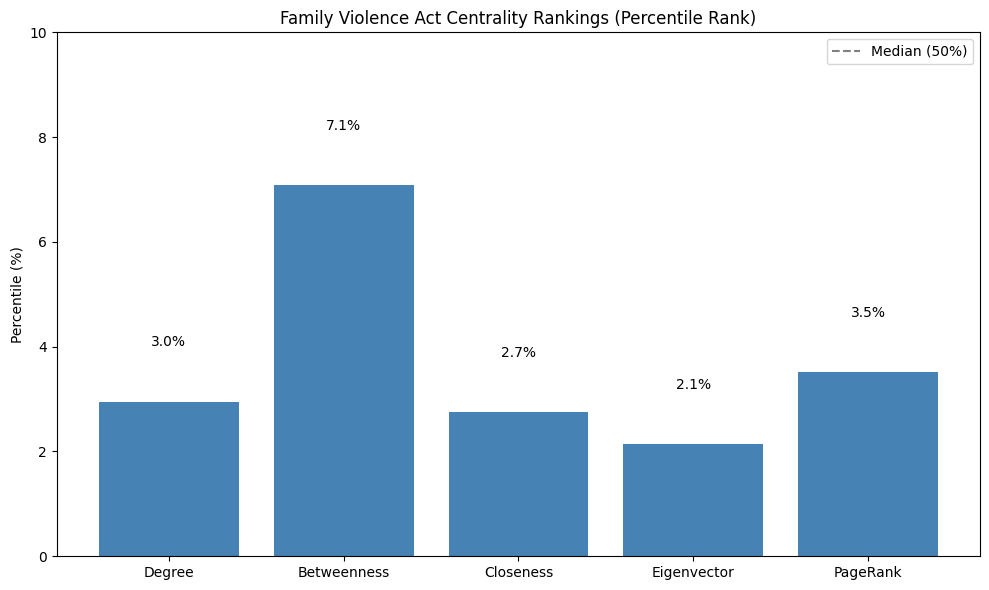

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# === Step 1: Load the centrality data ===
df = pd.read_csv("centrality_measures_full_network.csv")

# === Step 2: Find Family Violence Act ===
fva = df[df["name"].str.contains("Family Violence Act", case=False)]

# === Step 3: Calculate rank and percentiles ===
total = len(df)
ranks = {
    "Degree": df["degree"].rank(ascending=False)[fva.index].values[0],
    "Betweenness": df["betweenness"].rank(ascending=False)[fva.index].values[0],
    "Closeness": df["closeness"].rank(ascending=False)[fva.index].values[0],
    "Eigenvector": df["eigenvector"].rank(ascending=False)[fva.index].values[0],
    "PageRank": df["pagerank"].rank(ascending=False)[fva.index].values[0]
}
percentiles = {k: (v / total) * 100 for k, v in ranks.items()}

# === Step 4: Plot ===
plt.figure(figsize=(10, 6))
bars = plt.bar(percentiles.keys(), percentiles.values(), color='steelblue')
plt.title("Family Violence Act Centrality Rankings (Percentile Rank)")
plt.ylabel("Percentile (%)")
plt.ylim(0, 10)
plt.axhline(50, color='gray', linestyle='--', label='Median (50%)')

# Add labels on top
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1,
             f"{height:.1f}%", ha='center', va='bottom')

plt.legend()
plt.tight_layout()
plt.show()

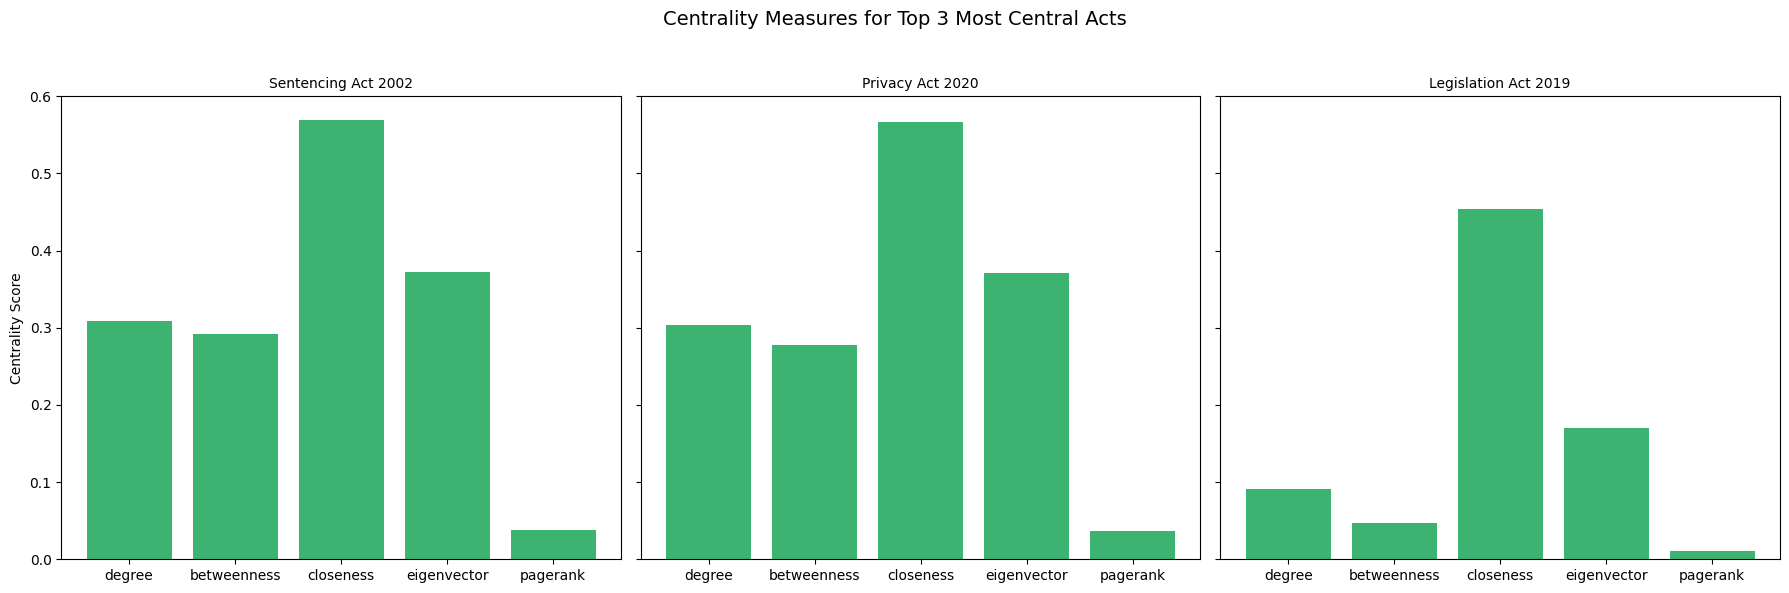

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load centrality data
df = pd.read_csv("centrality_measures_full_network.csv")

# Add average centrality to rank overall importance
df['average_centrality'] = df[['degree', 'betweenness', 'closeness', 'eigenvector', 'pagerank']].mean(axis=1)

# Select top 3 overall central acts
top_acts = df.sort_values("average_centrality", ascending=False).head(3)

# Plot side-by-side bar charts for each top act
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), sharey=True)
centrality_cols = ["degree", "betweenness", "closeness", "eigenvector", "pagerank"]

for i, (_, row) in enumerate(top_acts.iterrows()):
    scores = [row[col] for col in centrality_cols]
    axes[i].bar(centrality_cols, scores, color='mediumseagreen')
    axes[i].set_title(f"{row['name']}", fontsize=10)
    axes[i].set_ylabel("Centrality Score" if i == 0 else "")
    # axes[i].set_ylim(0, max(scores) * 1.2)
    axes[i].set_ylim(0, 0.6)

plt.suptitle("Centrality Measures for Top 3 Most Central Acts", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("top_3_central_acts_comparison.png", dpi=300)
plt.show()

In [6]:
# Create sorted top 10 lists for each centrality measure
top_10_degree = df.sort_values("degree", ascending=False).head(10)[["name", "degree"]]
top_10_betweenness = df.sort_values("betweenness", ascending=False).head(10)[["name", "betweenness"]]
top_10_closeness = df.sort_values("closeness", ascending=False).head(10)[["name", "closeness"]]
top_10_eigenvector = df.sort_values("eigenvector", ascending=False).head(10)[["name", "eigenvector"]]
top_10_pagerank = df.sort_values("pagerank", ascending=False).head(10)[["name", "pagerank"]]

# Combine all into a multi-column DataFrame
top_10_combined = pd.concat([
    top_10_degree.reset_index(drop=True),
    top_10_betweenness.reset_index(drop=True),
    top_10_closeness.reset_index(drop=True),
    top_10_eigenvector.reset_index(drop=True),
    top_10_pagerank.reset_index(drop=True)
], axis=1)

# Save to CSV for report or visual use
top_10_combined.to_csv("top_10_acts_by_centrality.csv", index=False)
print("✅ Saved: top_10_acts_by_centrality.csv")

# Display as table (if using Jupyter or similar)
from IPython.display import display
display(top_10_combined)

✅ Saved: top_10_acts_by_centrality.csv


,name,degree,name,betweenness,name,closeness,name,eigenvector,name,pagerank
0,Sentencing Act 2002,0.309221,Sentencing Act 2002,0.292096,Sentencing Act 2002,0.568797,Sentencing Act 2002,0.372693,Sentencing Act 2002,0.037743
1,Privacy Act 2020,0.303107,Privacy Act 2020,0.277383,Privacy Act 2020,0.566088,Privacy Act 2020,0.370685,Privacy Act 2020,0.036706
2,Income Tax Act 2007,0.103923,Income Tax Act 2007,0.071223,Legislation Act 2019,0.453816,Legislation Act 2019,0.170527,Income Tax Act 2007,0.014214
3,Legislation Act 2019,0.090678,Legislation Act 2019,0.046863,Income Tax Act 2007,0.440874,Criminal Procedure Act 2011,0.144977,Legislation Act 2019,0.010564
4,Criminal Procedure Act 2011,0.073867,Resource Management Act 1991,0.028123,Criminal Procedure Act 2011,0.435024,Income Tax Act 2007,0.137930,Criminal Procedure Act 2011,0.008281
5,Companies Act 1993,0.058584,Education Act 1989,0.026776,Domestic Violence Act 1995,0.423589,District Court Act 2016,0.119616,Companies Act 1993,0.007041
6,District Court Act 2016,0.056546,Immigration Act 2009,0.026487,Companies Act 1993,0.418646,Domestic Violence Act 1995,0.115637,Income Tax Act 2004,0.006358
7,Domestic Violence Act 1995,0.052471,Income Tax Act 2004,0.025934,District Court Act 2016,0.417910,Companies Act 1993,0.108031,District Court Act 2016,0.006331
8,Income Tax Act 2004,0.045848,Criminal Procedure Act 2011,0.025043,Official Information Act 1982,0.408659,Public Service Act 2020,0.098963,Resource Management Act 1991,0.006220
9,Resource Management Act 1991,0.044829,Companies Act 1993,0.024522,Education and Training Act 2020,0.408571,Education and Training Act 2020,0.093849,Education Act 1989,0.006078


## Community-Level Centrality Ranking

In [7]:
import networkx as nx
import pandas as pd
from collections import defaultdict

# Load the full graph
G = nx.read_gexf("nz_legislation_with_adjusted_communities.gexf")

# Group nodes by community
community_groups = defaultdict(list)
for node, data in G.nodes(data=True):
    community = data.get("community")
    community_groups[community].append(node)

# Store results
community_centrality_results = []

# For each community, compute centrality within the subgraph
for community_id, nodes in community_groups.items():
    subgraph = G.subgraph(nodes)
    degree = nx.degree_centrality(subgraph)
    betweenness = nx.betweenness_centrality(subgraph)
    closeness = nx.closeness_centrality(subgraph)
    eigenvector = nx.eigenvector_centrality(subgraph, max_iter=1000)

    # Combine into DataFrame
    data = []
    for node in subgraph.nodes():
        data.append({
            "community": community_id,
            "id": node,
            "name": subgraph.nodes[node].get("name", node),
            "degree": degree[node],
            "betweenness": betweenness[node],
            "closeness": closeness[node],
            "eigenvector": eigenvector[node]
        })
    df_comm = pd.DataFrame(data)
    top_acts = df_comm.sort_values("degree", ascending=False).head(3)
    community_centrality_results.append(top_acts)

# Combine all communities
final_comm_df = pd.concat(community_centrality_results, ignore_index=True)

# Save results
final_comm_df.to_csv("community_level_top_acts.csv", index=False)
print("✅ Saved: community_level_top_acts.csv")

# Show a sample
final_comm_df.sort_values("community")

✅ Saved: community_level_top_acts.csv


,community,id,name,degree,betweenness,closeness,eigenvector
11,3,Summary Proceedings Act 1957,Summary Proceedings Act 1957,0.203704,0.241236,0.500000,0.189654
10,3,Land Transport Management Act 2003,Land Transport Management Act 2003,0.222222,0.111344,0.477876,0.273680
9,3,Land Transport Act 1998,Land Transport Act 1998,0.574074,0.645632,0.658537,0.609913
12,4,Employment Relations Act 2000,Employment Relations Act 2000,0.375000,0.473687,0.567742,0.491221
14,4,Human Rights Act 1993,Human Rights Act 1993,0.193182,0.225505,0.483516,0.291447
13,4,Public Service Act 2020,Public Service Act 2020,0.204545,0.236281,0.514620,0.340723
19,6,Local Electoral Act 2001,Local Electoral Act 2001,0.280000,0.317143,0.495050,0.288213
18,6,Electoral Act 1993,Electoral Act 1993,0.580000,0.878367,0.675676,0.641293
20,6,Broadcasting Act 1989,Broadcasting Act 1989,0.160000,0.192245,0.450450,0.176417
23,7,Privacy Act 1993,Privacy Act 1993,0.076531,0.031969,0.448135,0.094982


In [8]:
import networkx as nx
import pandas as pd
from collections import defaultdict

# Load the full graph
G = nx.read_gexf("nz_legislation_with_adjusted_communities.gexf")

# Group nodes by community
community_groups = defaultdict(list)
for node, data in G.nodes(data=True):
    community = data.get("community")
    community_groups[community].append(node)

# Store results
community_centrality_results = []

# For each community, compute centrality within the subgraph
for community_id, nodes in community_groups.items():
    subgraph = G.subgraph(nodes)
    degree = nx.degree_centrality(subgraph)
    betweenness = nx.betweenness_centrality(subgraph)
    closeness = nx.closeness_centrality(subgraph)
    eigenvector = nx.eigenvector_centrality(subgraph, max_iter=1000)

    # Combine into DataFrame
    data = []
    for node in subgraph.nodes():
        data.append({
            "community": community_id,
            "id": node,
            "name": subgraph.nodes[node].get("name", node),
            "degree": degree[node],
            "betweenness": betweenness[node],
            "closeness": closeness[node],
            "eigenvector": eigenvector[node]
        })
    df_comm = pd.DataFrame(data)
    top_acts = df_comm.sort_values("degree", ascending=False).head(1)
    community_centrality_results.append(top_acts)

# Combine all communities
final_comm_df = pd.concat(community_centrality_results, ignore_index=True)

# Save results
final_comm_df.to_csv("community_level_top_act.csv", index=False)
print("✅ Saved: community_level_top_acts.csv")

# Show a sample
final_comm_df.sort_values("community")

✅ Saved: community_level_top_acts.csv


,community,id,name,degree,betweenness,closeness,eigenvector
3,3,Land Transport Act 1998,Land Transport Act 1998,0.574074,0.645632,0.658537,0.609913
4,4,Employment Relations Act 2000,Employment Relations Act 2000,0.375000,0.473687,0.567742,0.491221
6,6,Electoral Act 1993,Electoral Act 1993,0.580000,0.878367,0.675676,0.641293
7,7,Sentencing Act 2002,Sentencing Act 2002,0.673469,0.480821,0.736735,0.512813
1,8,High Court Rules 2016,High Court Rules 2016,0.212903,0.284618,0.493631,0.352392
8,9,Legislation Act 2019,Legislation Act 2019,0.234483,0.382729,0.519713,0.449397
2,10,Income Tax Act 2007,Income Tax Act 2007,0.391753,0.510115,0.600000,0.468457
9,11,Education Act 1989,Education Act 1989,0.387755,0.455538,0.581880,0.460515
10,12,Companies Act 1993,Companies Act 1993,0.325203,0.405934,0.551570,0.449372
5,15,Resource Management Act 1991,Resource Management Act 1991,0.217557,0.328571,0.504999,0.418525


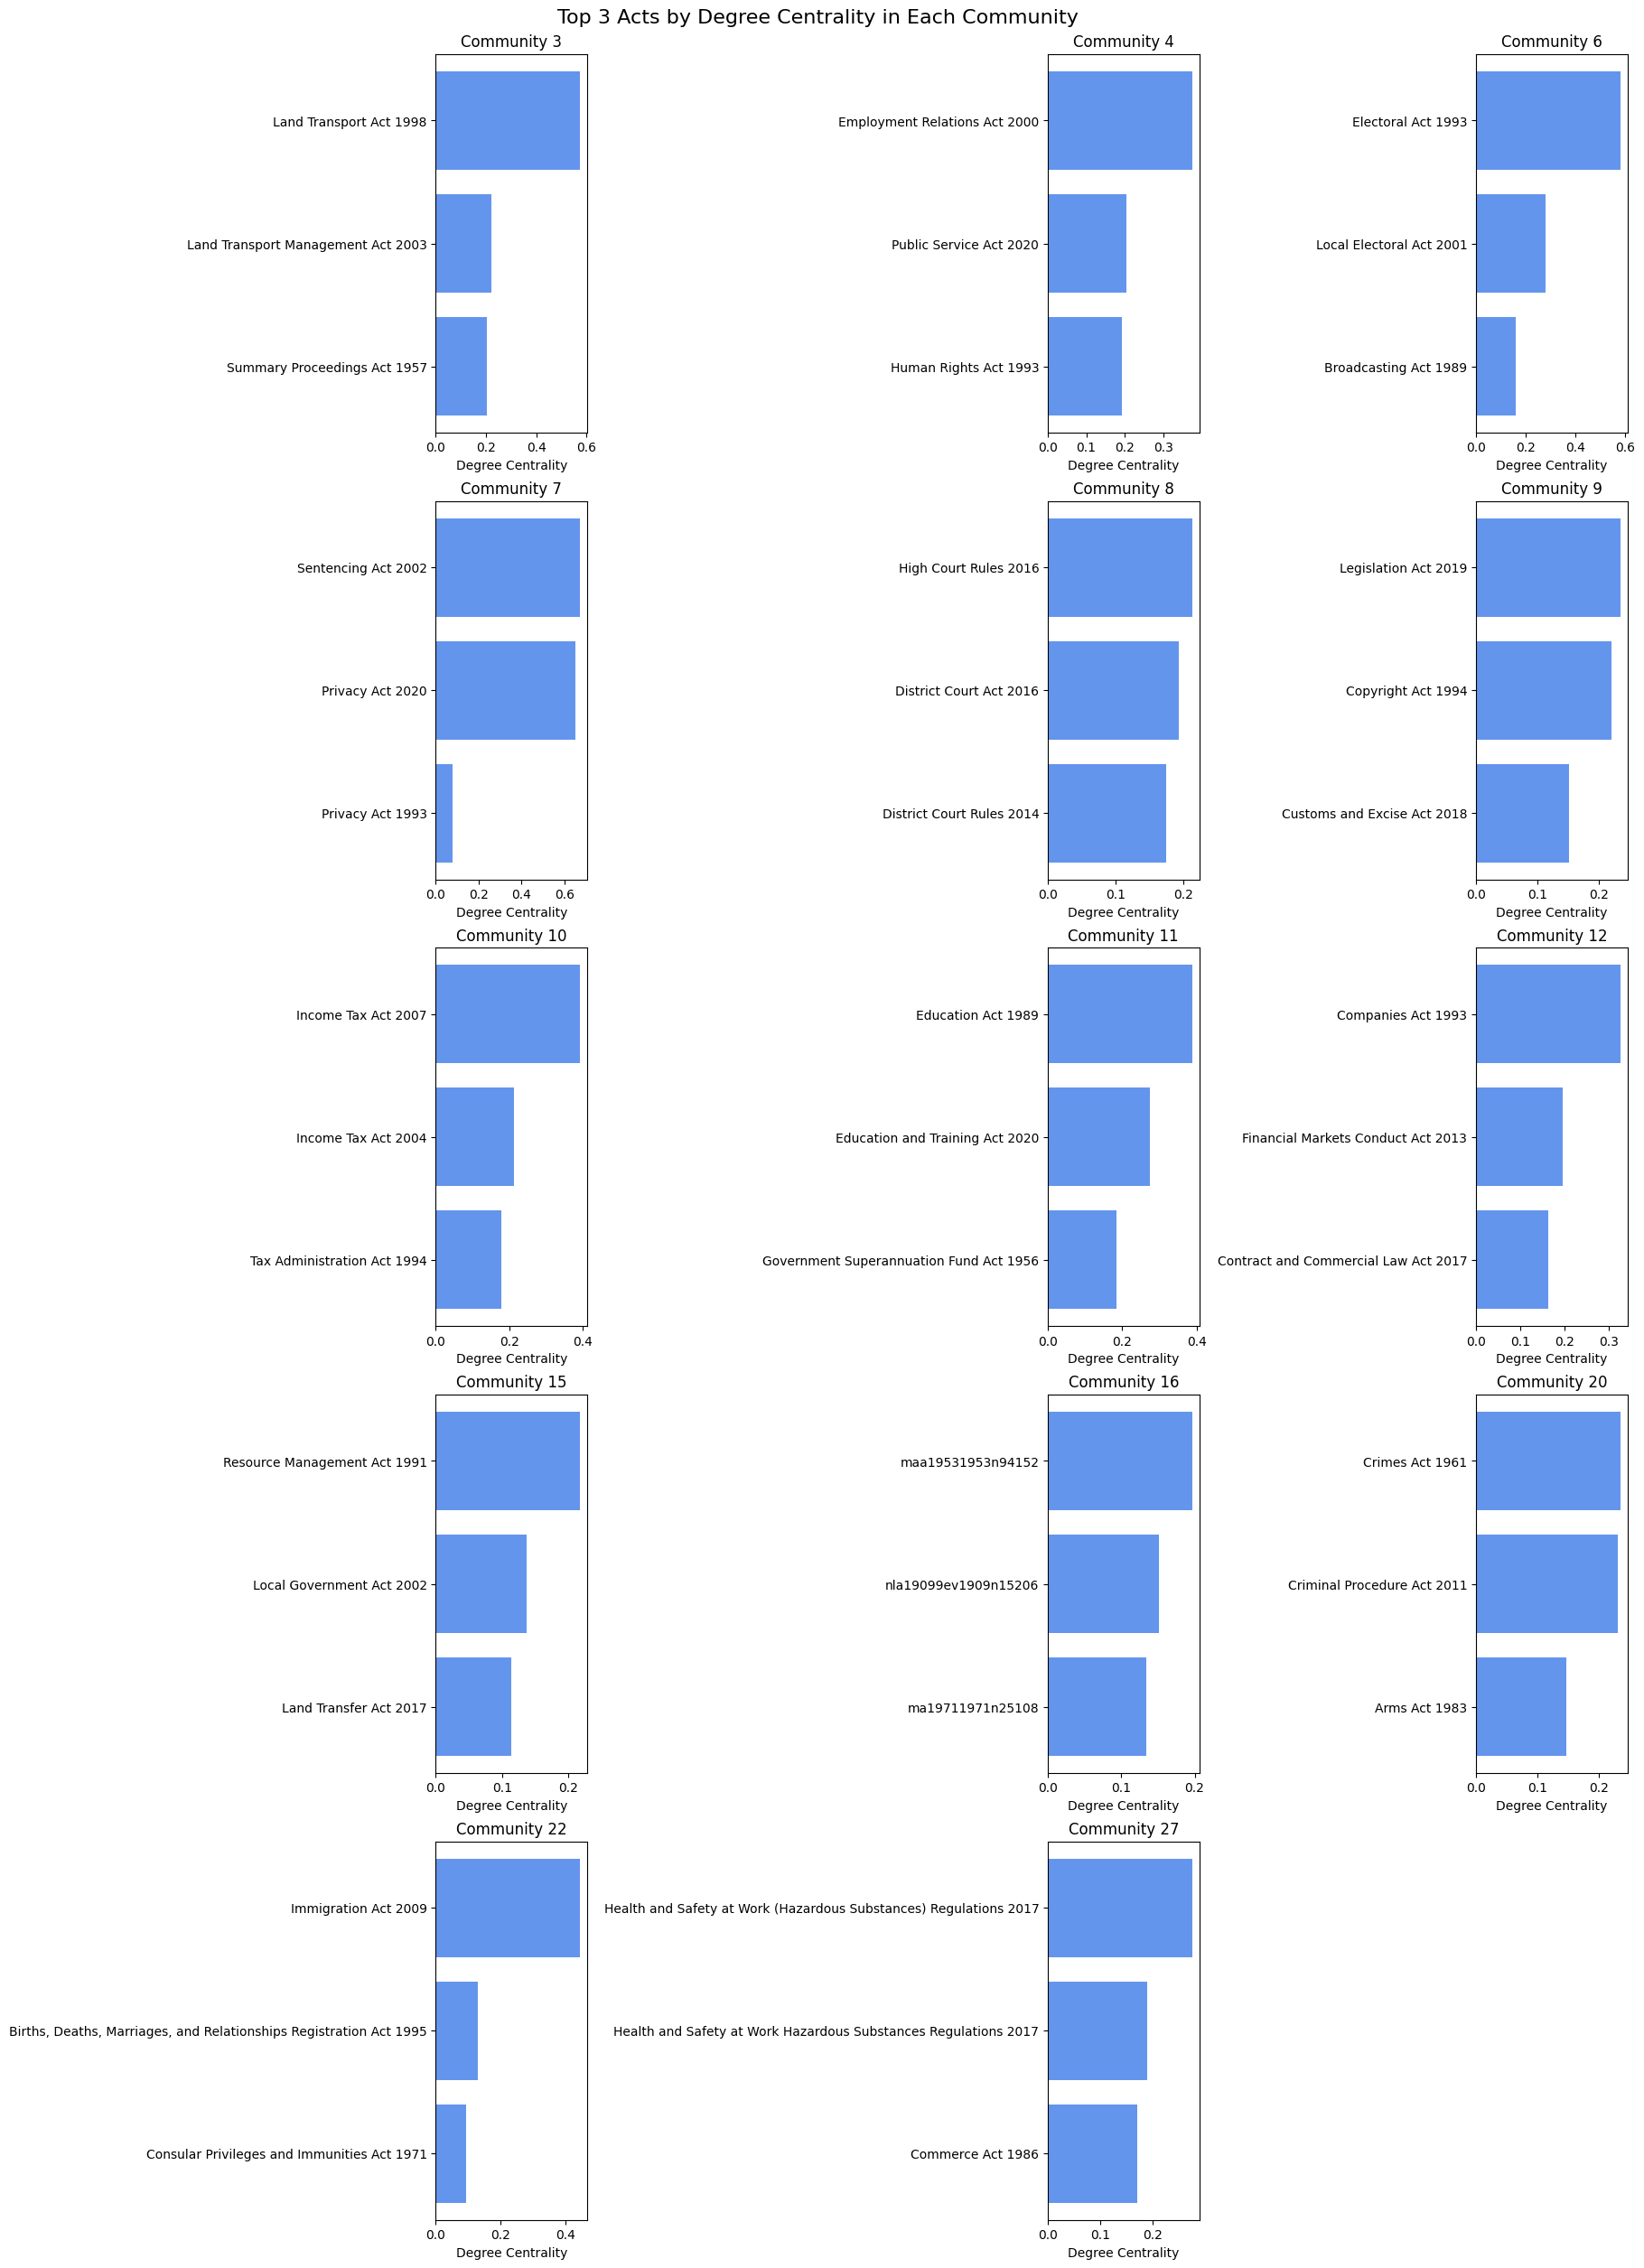

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# === Step 1: Load the CSV ===
df = pd.read_csv("community_level_top_acts.csv")

# === Step 2: Sort for clean plotting ===
df = df.sort_values(["community", "degree"], ascending=[True, False])

# === Step 3: Plot ===
# Number of communities
communities = df["community"].unique()
ncols = 3  # you can change to 2 or 4 depending on layout preference
nrows = (len(communities) + ncols - 1) // ncols

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 5 * nrows), constrained_layout=True)
axes = axes.flatten()

for idx, comm in enumerate(communities):
    subset = df[df["community"] == comm]
    ax = axes[idx]
    ax.barh(subset["name"], subset["degree"], color="cornflowerblue")
    ax.set_title(f"Community {comm}", fontsize=12)
    ax.set_xlabel("Degree Centrality")
    ax.invert_yaxis()  # Most central on top

# Hide unused subplots
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

# Overall title and save
plt.suptitle("Top 3 Acts by Degree Centrality in Each Community", fontsize=16)
plt.savefig("top_acts_by_community.png", dpi=300)
plt.show()

## Family Violence Act

In [ ]:
import pandas as pd
import networkx as nx

# Load the graph
G = nx.read_gexf("nz_legislation_with_adjusted_communities.gexf")

# Step 1: Find the Family Violence Act node and its community
fva_node = None

for node, data in G.nodes(data=True):
    if "family violence act 2018" in str(data.get("label", "")).lower():
        fva_node = node
        fva_label = data.get("label", "")
        fva_community = data.get("community", None)
        break

if fva_node is None:
    raise ValueError("❌ Family Violence Act not found.")

print(f"✅ Family Violence Act: '{fva_label}' is in Community {fva_community}")

# Step 2: Extract subgraph for that community
sub_nodes = [n for n, d in G.nodes(data=True) if d.get("community") == fva_community]
subgraph = G.subgraph(sub_nodes)

# Step 3: Compute centralities within community
degree = nx.degree_centrality(subgraph)
betweenness = nx.betweenness_centrality(subgraph)
closeness = nx.closeness_centrality(subgraph)
eigenvector = nx.eigenvector_centrality(subgraph, max_iter=1000)

# Step 4: Rank Family Violence Act in community
df_comm = pd.DataFrame({
    "id": list(subgraph.nodes()),
    "name": [subgraph.nodes[n].get("name", n) for n in subgraph.nodes()],
    "degree": [degree[n] for n in subgraph.nodes()],
    "betweenness": [betweenness[n] for n in subgraph.nodes()],
    "closeness": [closeness[n] for n in subgraph.nodes()],
    "eigenvector": [eigenvector[n] for n in subgraph.nodes()],
})

df_comm["avg"] = df_comm[["degree", "betweenness", "closeness", "eigenvector"]].mean(axis=1)

# Add ranks
for metric in ["degree", "betweenness", "closeness", "eigenvector", "avg"]:
    df_comm[f"{metric}_rank"] = df_comm[metric].rank(ascending=False)

# Extract Family Violence Act row
fva_local = df_comm[df_comm["id"] == fva_node]

# Save for your thesis
df_comm.to_csv("fva_community_centrality.csv", index=False)
print("✅ Saved: fva_community_centrality.csv")

print(f"Family Violence Act Rankings in Community {fva_community}:")

# Show top 10 and where Family Violence Act ranks
top_10 = df_comm.sort_values("avg", ascending=False).head(10)
fva_local

✅ Family Violence Act: 'Family Violence Act 2018' is in Community 20
✅ Saved: fva_community_centrality.csv
Family Violence Act Rankings in Community 20:


,id,name,degree,betweenness,closeness,eigenvector,avg,degree_rank,betweenness_rank,closeness_rank,eigenvector_rank,avg_rank
169,Family Violence Act 2018,Family Violence Act 2018,0.110599,0.039151,0.427042,0.203713,0.195126,11.0,18.0,9.5,8.0,11.0


✅ Family Violence Act is in Community 20


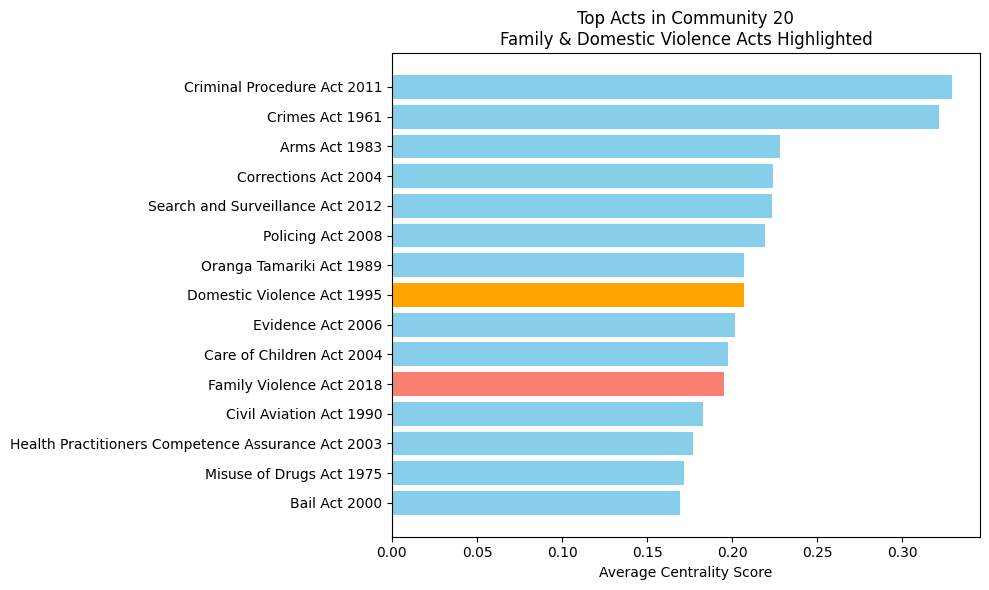

In [14]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Load the graph
G = nx.read_gexf("nz_legislation_with_adjusted_communities.gexf")

# Step 1: Find both Family Violence Act and Domestic Violence Act
fva_label_match = "family violence act 2018"
dva_label_match = "domestic violence act 1995"

fva_node, dva_node = None, None

for node, data in G.nodes(data=True):
    label = str(data.get("label", "")).lower()
    if fva_label_match in label:
        fva_node = node
        fva_label = data["label"]
        fva_community = data.get("community", None)
    if dva_label_match in label:
        dva_node = node
        dva_label = data["label"]

if fva_node is None or dva_node is None:
    raise ValueError("❌ One or both acts not found in the graph.")

print(f"✅ Family Violence Act is in Community {fva_community}")

# Step 2: Extract subgraph for that community
sub_nodes = [n for n, d in G.nodes(data=True) if d.get("community") == fva_community]
subgraph = G.subgraph(sub_nodes)

# Step 3: Compute centrality
degree = nx.degree_centrality(subgraph)
betweenness = nx.betweenness_centrality(subgraph)
closeness = nx.closeness_centrality(subgraph)
eigenvector = nx.eigenvector_centrality(subgraph, max_iter=1000)

# Step 4: Create DataFrame
df_comm = pd.DataFrame({
    "id": list(subgraph.nodes()),
    "label": [subgraph.nodes[n].get("label", n) for n in subgraph.nodes()],
    "degree": [degree[n] for n in subgraph.nodes()],
    "betweenness": [betweenness[n] for n in subgraph.nodes()],
    "closeness": [closeness[n] for n in subgraph.nodes()],
    "eigenvector": [eigenvector[n] for n in subgraph.nodes()]
})
df_comm["avg"] = df_comm[["degree", "betweenness", "closeness", "eigenvector"]].mean(axis=1)

# Step 5: Top 10 by average centrality
df_top = df_comm.sort_values("avg", ascending=False).head(15)

# Step 6: Custom color highlighting
def color_label(label):
    lbl = label.lower()
    if "family violence act" in lbl:
        return "salmon"
    elif "domestic violence act" in lbl:
        return "orange"
    else:
        return "skyblue"

colors = [color_label(lbl) for lbl in df_top["label"]]

# Step 7: Plot
plt.figure(figsize=(10, 6))
plt.barh(df_top["label"], df_top["avg"], color=colors)
plt.xlabel("Average Centrality Score")
plt.title(f"Top Acts in Community {fva_community}\nFamily & Domestic Violence Acts Highlighted")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("fva_dva_community_centrality.png", dpi=300)
plt.show()